In [56]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
from subprocess import call
import matplotlib.cm as cm
from matplotlib import rc
import matplotlib as mpl
import seaborn as sns 
from matplotlib.colors import ListedColormap
from ipywidgets import widgets as wgt

from ipywidgets import interact, widgets, FloatSlider, FloatText, fixed
from IPython.display import display, clear_output

from scipy.optimize import minimize
mpl.rcParams.update(
    {
        'figure.constrained_layout.use': True,
        'interactive': False,
        "text.usetex": False,  # Use mathtext, not LaTeX
        "font.family": "cmr10",  # Use the Computer modern font
        "mathtext.fontset": "cm",
        "axes.formatter.use_mathtext": True,
        "axes.unicode_minus": False,
    }
)

In [18]:
np.size(x_coordinates)

433481

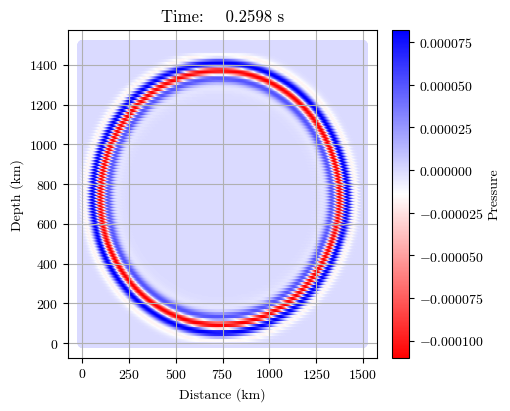

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Read data from files
grid_data = np.loadtxt('OUTPUT_FILES/wavefield_grid_for_dumps.txt')
wavefield_data = np.loadtxt('OUTPUT_FILES/wavefield0001600_01.txt')

# Extract x, y coordinates
x = grid_data[:, 0]
y = grid_data[:, 1]

# Extract z values (pressure)
pressure = wavefield_data

# Create heatmap
plt.figure(figsize=(5, 4))
plt.scatter(x, y, c=pressure, cmap='bwr_r')
plt.colorbar(label='Pressure')
plt.xlabel('Distance (km)')
plt.ylabel('Depth (km)')
plt.title('Time:    0.2598 s')
plt.grid(True)
plt.show()


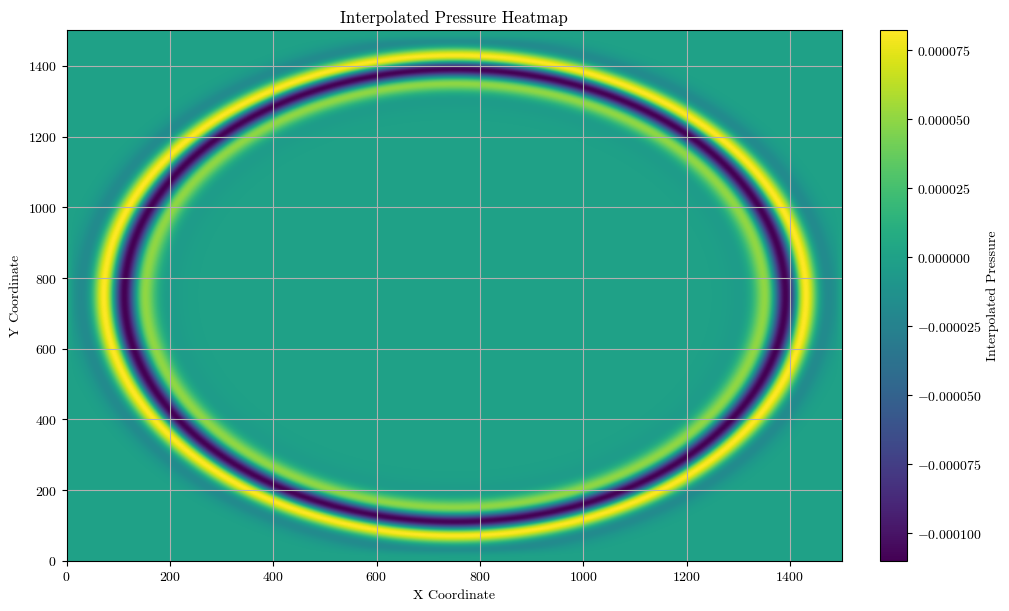

In [109]:
from scipy.interpolate import griddata

# Extract x, y coordinates
x = grid_data[:, 0]
y = grid_data[:, 1]

# Extract z values (pressure)
pressure = wavefield_data

# Define regular grid
x_min, x_max = np.min(x), np.max(x)
y_min, y_max = np.min(y), np.max(y)
xi = np.linspace(x_min, x_max, 1000)
yi = np.linspace(y_min, y_max, 1000)
xi, yi = np.meshgrid(xi, yi)

# Interpolate pressure values onto the regular grid
zi = griddata((x, y), pressure, (xi, yi), method='linear', cmap='bwr_r')

# Plot interpolated values
plt.figure(figsize=(10, 6))
plt.imshow(zi, extent=[x_min, x_max, y_min, y_max], cmap='viridis', origin='lower', aspect='auto')
plt.colorbar(label='Interpolated Pressure')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Interpolated Pressure Heatmap')
plt.grid(True)
plt.show()